Creating NBA Shot Charts with Python in Jupyter Notebook
 
Welcome to Jupyter Notebook. I like to think of the Notebook itself as an interactive web page that allows us to run, modify, and export results using Python code - getting familiar with Jupyter Notebook will be useful for future collaboration that you might do someday!

First thing's first. If you haven't use Jupyter Notebook before, I recommend that you become familiar with the environment. To become a little bit more acquainted with Jupyter Notebook, I recommend you watch the intro video here: https://www.codecademy.com/articles/how-to-use-jupyter-notebooks.

When you're ready, you are encouraged to run the code one snippet at a time using the |>Run button in the menu at the top. That way you will see the relevant outputs that you will need to observe to continue making modifications to the code. When you have made the modifications, simply hit run again. If you want to make modifications to the code in a pervious snippet, simply click "Kernal" > Restart & Clear Ouput. Then, run the code up to the modification that you made.

You are free to modify as much of the code as you want to - lines that begin with #ACTION NEEDED will be those you can use to personalize the code. 

____________________________________________________________________________________________________________________________
(ADDITIONAL INFO - NOT REQUIRED) This code has been modified from http://savvastjortjoglou.com/nba-shot-sharts.html to show the power of using Python to interact with the NBA's API and the python package "NBA_API" to produce shot charts. You are encouraged to look at the documentation for the NBA_API module that we will be working with (https://github.com/swar/nba_api)

These lines install the relevant python modules that will be necessary for this code. Since we are all working on roaming profiles, we are using the --user note to install these python modules on your personal profile.

In [1]:
import pyexpat

In [2]:
!pip install numpy==1.22.3

In [3]:
!pip3 install nba_api

These lines import the relevant libraries from the Python modules installed in the previous code snippet.

In [4]:
from nba_api.stats.endpoints import commonplayerinfo, shotchartdetail
import pprint
pp = pprint.PrettyPrinter(indent=4)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Verdana']

This snippet imports the relevant libraries to interact with the NBA API relevant with obtaining information about the players, and storing them in a dictionary.

In [5]:
from nba_api.stats.static import players
player_dict = players.get_players()

current_player = 'Kyle Lowry'

# ACTION NEEDED: You need to decide what player's shooting efficiency you're going to dive into.
#   Look at nba.com to look at the leader board to choose to ensure that you choose a player that
#   has enough shots to make a worthwhile map. Note-- the names are case sensitive. If you choose
#  lebron james, you will throw and error. The input would have to be "LeBron James"
player_details = [player for player in player_dict if player['full_name'] == current_player][0]

# This command prints the information about the player within the playerinfo API module.
player_details


{'id': 200768,
 'full_name': 'Kyle Lowry',
 'first_name': 'Kyle',
 'last_name': 'Lowry',
 'is_active': True}

We need to extract just the id number so we can import the shotchart information for the player.

In [6]:
player_num = player_details['id']
player_num


200768

In [7]:
# ACTION NEEDED: Enter the player id number into this line. For example, the number "200768" is the player id for 
#   Stephen Curry. Please enter your player number obtained in the last code snippet here.
player_info = commonplayerinfo.CommonPlayerInfo(player_id=player_num)



This snippet obtains the most recent information about the player hosted by the NBA API. The output of these lines essentially provide a brief overview of the player's 2019-20 season, including the points, assists, rebounds, and PIE (the proportion of events that occur in a game that the player is directly involved in -- the higher the better). 

In [8]:
player_stats = player_info.player_headline_stats.get_dict()
print(player_stats)

{'headers': ['PLAYER_ID', 'PLAYER_NAME', 'TimeFrame', 'PTS', 'AST', 'REB', 'PIE'], 'data': [[200768, 'Kyle Lowry', '2023-24', 8.1, 4.2, 3.2, 0.077]]}


This code snippet is probably the MOST IMPORTANT set of input lines in the code. This snippet is where you decide what player's shot data you're going to examine. Also, what are the filters that you're going to apply to help understand the player? There are several ways in which a player's statistics can be filtered, and you are encouragd to look at the different ways that the data can be filtered in the github NBA_API documentation for "ShotChartDetail" here: https://github.com/hkair/nba_api/blob/master/docs/nba_api/stats/endpoints/shotchartdetail.md. If you choose to include more in the code below, be sure to add a comma (",") at the end of the line, or a syntax error will be thrown.

The default filters that are provided here are:
    
    player_id = player_num (this is the default, as you have identified a player in previous code snippets).
    
    season_nullable = '2018-19' (you can decide which year you would like to view. If you leave this commented out, the entire player's career will be included.
    
    season_type_all_star = You can choose to look at shots taken in the "Pre Season", "Regular Season" or "Playoffs".
    
    team_id = 0 - keep this as default. It essentially extracts shots taken by the player regardless of whatever team they played for. If your player has been traded or signed with mulitple teams, you could filter their shots to a specific team, but keeping it at 0 is just easier.
    
    context_measure_simple = 'FGA'. KEEP THIS AS DEFAULT. If you comment this out or modify it, the player's missed shots will not be extracted and will break subsequent lines of code.

In [9]:
pd.options.display.max_seq_items = 100

def get_shotchartdetail(season_type):
    shot_chart = shotchartdetail.ShotChartDetail(
        #ACTION NEEDED: This is the section where you are going to set the parameters for choosing the data
        #that you're going to use to make the shot chart. You have to decide which season (comment out using "#")
        #if you want all the player's shooting data. (keep in mind this may be too much data!)

        #player_id has a number generated for each player. 
        player_id=player_num,
        #You can use "Last_n_games" to obtain shot information for the last n amount of games the player played.    
        #last_n_games=40,
        season_nullable='2018-19',
        #season_type_all_star='Regular Season',
        season_type_all_star=season_type,
        #season_type_all_star="All Star",
        team_id=0,
        context_measure_simple='FGA',
        #vs_conference_nullable = "West"
    )
    return shot_chart.shot_chart_detail.get_data_frame()

# regular_season_data = get_shotchartdetail('Regular Season')
# playoffs_data = get_shotchartdetail('Playoffs')
# shot_df = pd.concat([regular_season_data, playoffs_data], ignore_index=True)
shot_df = get_shotchartdetail('Playoffs')

#This line prints out a truncated list of all the shots that are extracted through the NBA API based on the parameters above.
# print(shot_chart.get_available_data())
# shot_df = shot_chart.shot_chart_detail.get_data_frame()
shot_df#.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0041800111,55,200768,Kyle Lowry,1610612761,Toronto Raptors,1,7,50,...,Left Side Center(LC),24+ ft.,24,-153,196,1,0,20190413,TOR,ORL
1,Shot Chart Detail,0041800111,70,200768,Kyle Lowry,1610612761,Toronto Raptors,1,6,43,...,Center(C),24+ ft.,26,64,254,1,0,20190413,TOR,ORL
2,Shot Chart Detail,0041800111,188,200768,Kyle Lowry,1610612761,Toronto Raptors,2,9,46,...,Center(C),24+ ft.,25,52,253,1,0,20190413,TOR,ORL
3,Shot Chart Detail,0041800111,286,200768,Kyle Lowry,1610612761,Toronto Raptors,2,1,41,...,Center(C),24+ ft.,26,65,256,1,0,20190413,TOR,ORL
4,Shot Chart Detail,0041800111,370,200768,Kyle Lowry,1610612761,Toronto Raptors,3,6,9,...,Center(C),Less Than 8 ft.,3,-4,32,1,0,20190413,TOR,ORL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Shot Chart Detail,0041800406,379,200768,Kyle Lowry,1610612761,Toronto Raptors,3,6,57,...,Left Side(L),24+ ft.,23,-236,-8,1,0,20190613,GSW,TOR
273,Shot Chart Detail,0041800406,480,200768,Kyle Lowry,1610612761,Toronto Raptors,3,0,30,...,Center(C),Less Than 8 ft.,2,1,20,1,1,20190613,GSW,TOR
274,Shot Chart Detail,0041800406,525,200768,Kyle Lowry,1610612761,Toronto Raptors,4,9,57,...,Right Side Center(RC),16-24 ft.,20,105,172,1,0,20190613,GSW,TOR
275,Shot Chart Detail,0041800406,547,200768,Kyle Lowry,1610612761,Toronto Raptors,4,8,18,...,Left Side Center(LC),24+ ft.,26,-154,210,1,0,20190613,GSW,TOR


This line filters all the shots taken by the player to only have shots that were made, scoring points for their team.

In [10]:
MADE = shot_df[shot_df['SHOT_MADE_FLAG']==1]
MADE

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
7,Shot Chart Detail,0041800112,78,200768,Kyle Lowry,1610612761,Toronto Raptors,1,6,52,...,Left Side Center(LC),24+ ft.,26,-120,241,1,1,20190416,TOR,ORL
9,Shot Chart Detail,0041800112,173,200768,Kyle Lowry,1610612761,Toronto Raptors,2,10,54,...,Left Side Center(LC),24+ ft.,26,-168,204,1,1,20190416,TOR,ORL
10,Shot Chart Detail,0041800112,192,200768,Kyle Lowry,1610612761,Toronto Raptors,2,8,54,...,Center(C),Less Than 8 ft.,1,-9,-5,1,1,20190416,TOR,ORL
12,Shot Chart Detail,0041800112,231,200768,Kyle Lowry,1610612761,Toronto Raptors,2,6,4,...,Center(C),Less Than 8 ft.,0,-5,2,1,1,20190416,TOR,ORL
14,Shot Chart Detail,0041800112,325,200768,Kyle Lowry,1610612761,Toronto Raptors,2,0,15,...,Center(C),Less Than 8 ft.,1,6,12,1,1,20190416,TOR,ORL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,Shot Chart Detail,0041800406,139,200768,Kyle Lowry,1610612761,Toronto Raptors,1,1,34,...,Left Side(L),24+ ft.,22,-229,8,1,1,20190613,GSW,TOR
268,Shot Chart Detail,0041800406,295,200768,Kyle Lowry,1610612761,Toronto Raptors,2,1,25,...,Center(C),Less Than 8 ft.,7,8,78,1,1,20190613,GSW,TOR
269,Shot Chart Detail,0041800406,312,200768,Kyle Lowry,1610612761,Toronto Raptors,2,0,28,...,Center(C),Less Than 8 ft.,7,66,36,1,1,20190613,GSW,TOR
273,Shot Chart Detail,0041800406,480,200768,Kyle Lowry,1610612761,Toronto Raptors,3,0,30,...,Center(C),Less Than 8 ft.,2,1,20,1,1,20190613,GSW,TOR


This line filters all the shots taken by the player to only have shots that were missed, not scoring any points.

In [11]:
MISSED = shot_df[shot_df['SHOT_MADE_FLAG']==0]
MISSED

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0041800111,55,200768,Kyle Lowry,1610612761,Toronto Raptors,1,7,50,...,Left Side Center(LC),24+ ft.,24,-153,196,1,0,20190413,TOR,ORL
1,Shot Chart Detail,0041800111,70,200768,Kyle Lowry,1610612761,Toronto Raptors,1,6,43,...,Center(C),24+ ft.,26,64,254,1,0,20190413,TOR,ORL
2,Shot Chart Detail,0041800111,188,200768,Kyle Lowry,1610612761,Toronto Raptors,2,9,46,...,Center(C),24+ ft.,25,52,253,1,0,20190413,TOR,ORL
3,Shot Chart Detail,0041800111,286,200768,Kyle Lowry,1610612761,Toronto Raptors,2,1,41,...,Center(C),24+ ft.,26,65,256,1,0,20190413,TOR,ORL
4,Shot Chart Detail,0041800111,370,200768,Kyle Lowry,1610612761,Toronto Raptors,3,6,9,...,Center(C),Less Than 8 ft.,3,-4,32,1,0,20190413,TOR,ORL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Shot Chart Detail,0041800406,314,200768,Kyle Lowry,1610612761,Toronto Raptors,2,0,3,...,Left Side Center(LC),24+ ft.,27,-169,211,1,0,20190613,GSW,TOR
271,Shot Chart Detail,0041800406,377,200768,Kyle Lowry,1610612761,Toronto Raptors,3,7,1,...,Center(C),Less Than 8 ft.,4,-31,31,1,0,20190613,GSW,TOR
272,Shot Chart Detail,0041800406,379,200768,Kyle Lowry,1610612761,Toronto Raptors,3,6,57,...,Left Side(L),24+ ft.,23,-236,-8,1,0,20190613,GSW,TOR
274,Shot Chart Detail,0041800406,525,200768,Kyle Lowry,1610612761,Toronto Raptors,4,9,57,...,Right Side Center(RC),16-24 ft.,20,105,172,1,0,20190613,GSW,TOR


This code snippetshows a simple plot showing all the shots taken by the player based on their x/y coordinates.

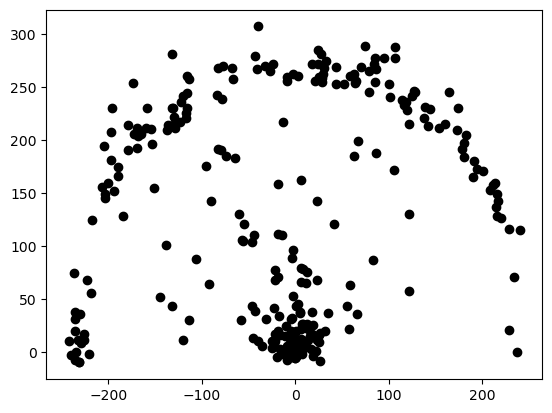

In [12]:
plt.plot(shot_df.LOC_X, shot_df.LOC_Y,'o',color='black')

Here is a simple plot showing all the made shots based on their x/y coordinates, followed by a plot below showing the made shots (green circles) and missed shots (red X's).

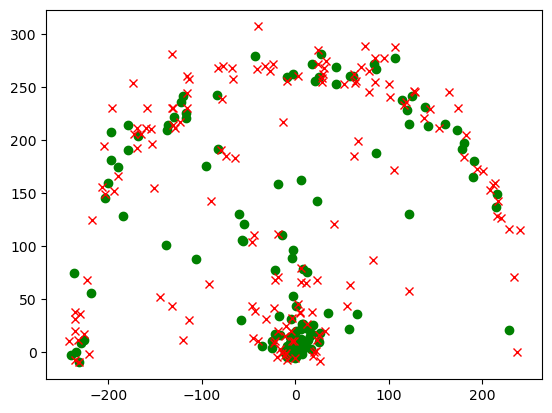

In [13]:
plt.plot(MADE.LOC_X, MADE.LOC_Y,'o',color='green')
plt.plot(MISSED.LOC_X, MISSED.LOC_Y,'x',color='red')

This next code snippet is a complicated one, that has been used in many shot chart analyses published to the web. In the next code block, various elements of a Basketball court are drawn. 

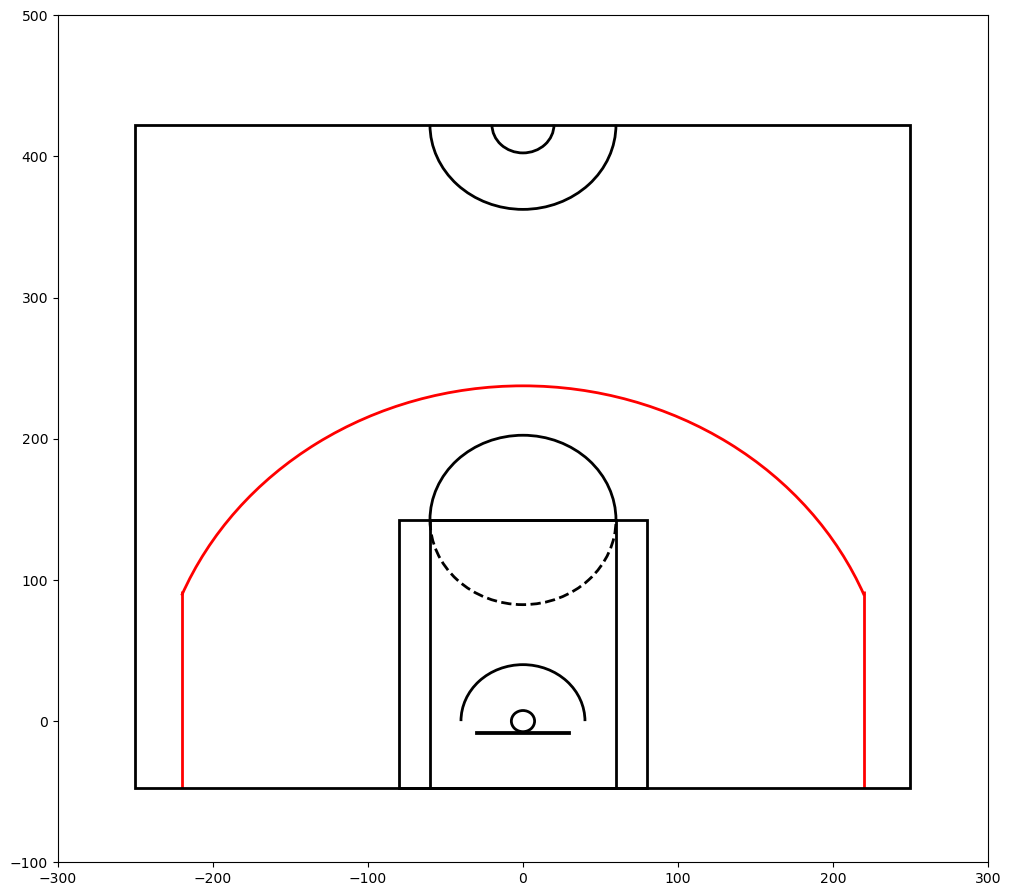

In [14]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color="black", fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color="black")

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color='red')
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color='red')
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color='red')

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc,hoop,backboard]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

Here we are going to show the shots that were missed and made by the player on the same plot overlaid on the Basketball court that we just drew.

The missed shots are going to be noted as red "x"'s, and made shots are going to be green "o"'s.

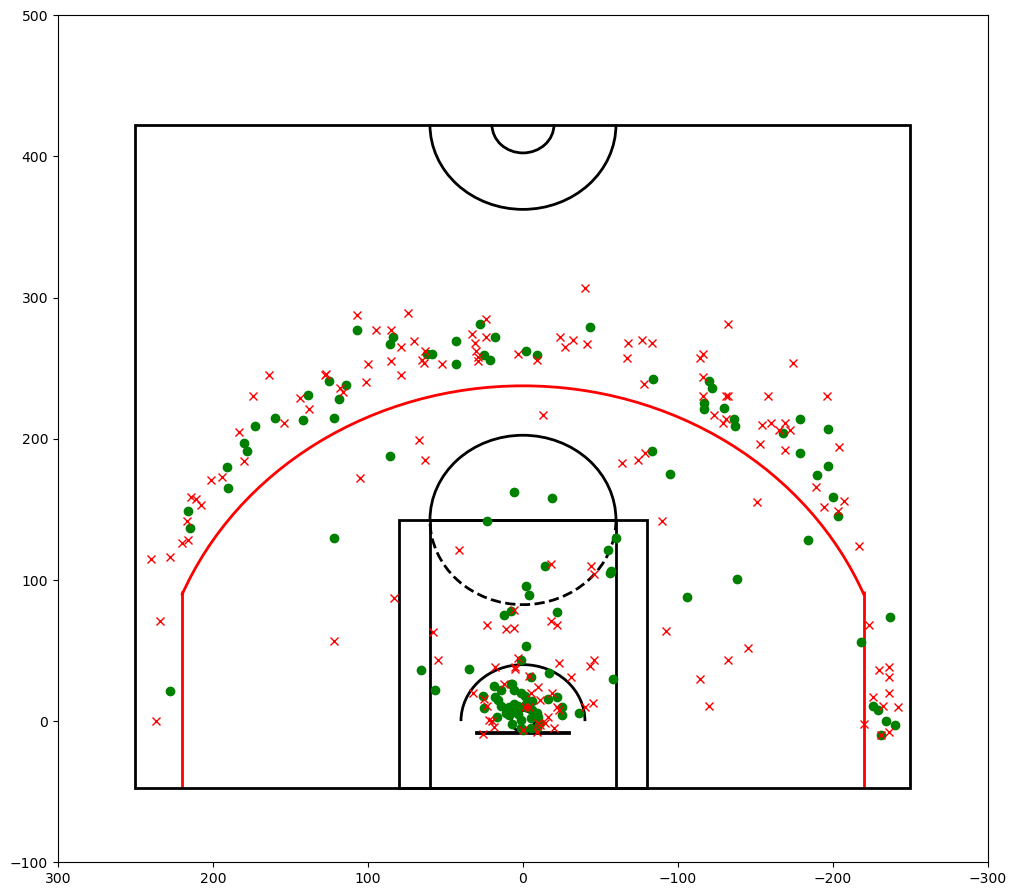

In [15]:
#This determines the figure's size.
plt.figure(figsize=(12,11))

#Plot the two series on the same chart. 
plt.plot(MADE.LOC_X, MADE.LOC_Y,'o',color='green')
plt.plot(MISSED.LOC_X, MISSED.LOC_Y,'x',color='red')

#Draw the court background
draw_court(outer_lines=True)

# Descending values along the axis from left to right. This inverts the data horizontally so that
# it shows up correctly on the chart.
plt.xlim(300,-300)
plt.ylim(-100,500)
plt.show()

Wow! Now that's impactful! We can clearly see that there are going to be clusters of shots in particular regions. There will be a cluster of shots in-close to the rim, and then a few other clusters depending on the player and the player's position. If a player is a point-guard, it's much more likely that they will be taking a greater proportion of their shots from outside of the 3-point arc. Take note of the player's position, and you might start to observe some tendancies.

______________________________________________________________________________________________________________________________
In this next code snippet, we are going to create a hex plot the calculates the mean value for each hex based on the input 0's (shot missed) and 1's (shot made). For instance, if 5 shots were taken by the player within the hex and 3 were made, the hexagon's value will be 0.6, or 60%. These types of plots quickly show where players are most effetive, and can show other tendancies as well (left- vs. right-handedness, offensive strategy, etc).

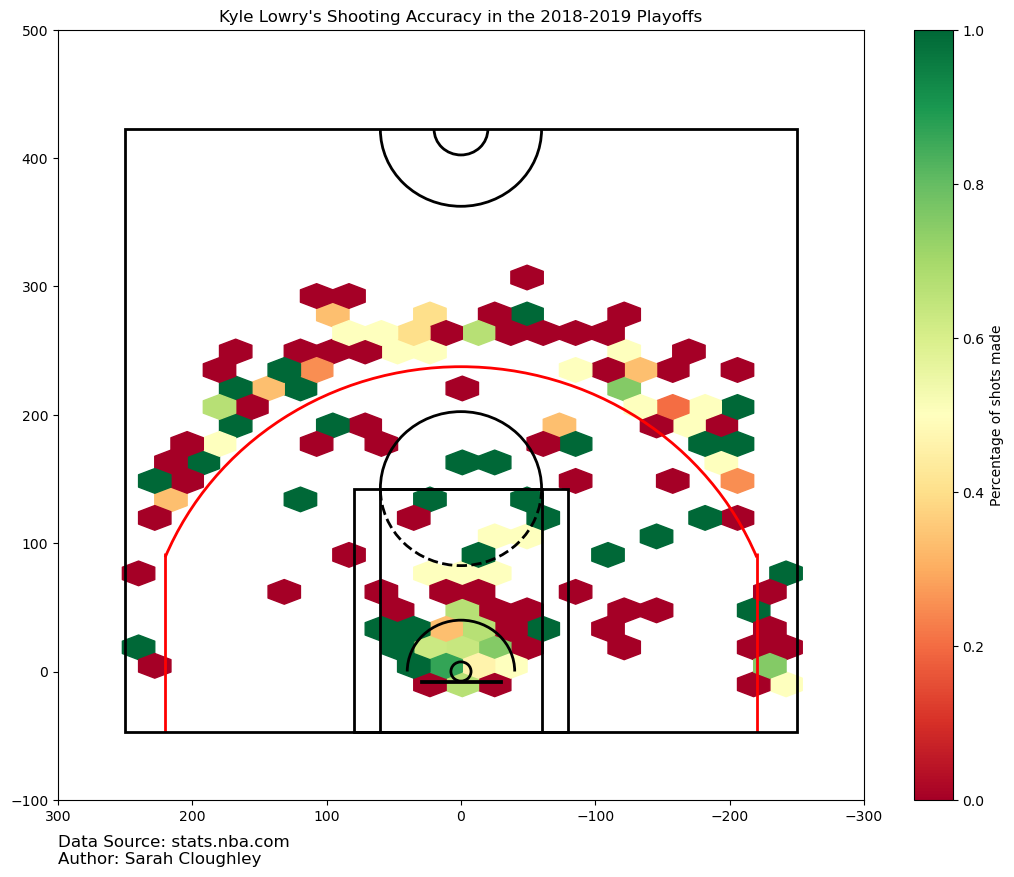

In [16]:
#This determines the figure's size.
plt.figure(figsize=(13,10))

# This creates the hex plot, extracting data from the original "shot_df" dataframe and basing the value of the hexagon 
#    on the mean value of the "SHOT MADE FLAG" column in the table. Items in this line that can be modified to change the
#    look of the plot:

# gridsize: This changes the amount of hexagons that cover the x- and y-axis. The lower the number, the larger the hexagon.

# vmin, vmax: This changes the min and max of the colour ramp. It's unlikely that a player will have an efficiency higher
#    than 70%, but you can play with the numbers to see what looks best.



# cmap: You can look up available colour ramps to choose one that you feel represents the data best!
plot = plt.hexbin(shot_df["LOC_X"],shot_df["LOC_Y"],C=shot_df['SHOT_MADE_FLAG'], gridsize=20, vmin = 0.0, vmax = 1, cmap=plt.get_cmap('RdYlGn'))

# draw the court background.
draw_court(outer_lines=True)

# Label the colourbar that's on the plot.
plt.colorbar(label="Percentage of shots made")

# Descending values along the axis from left to right. This inverts the data horizontally so that
#    it shows up correctly on the chart.
plt.xlim(300,-300)
plt.ylim(-100,500)

# ACTION NEEDED: You're going to need to make a title here based on the player you selected. For example:
#   It could be "Shot efficiency for Kyle Lowry during the 2018-19 playoffs"
#plt.title(f"{current_player}'s Shooting Accuracy in the 2018-2019 Season")
plt.title(f"{current_player}'s Shooting Accuracy in the 2018-2019 Playoffs")

# ACTION NEEDED: Add Data Scource and Author
plt.text(300,-150,'Data Source: stats.nba.com'
        '\nAuthor: Sarah Cloughley',
        fontsize=12)

# ACTION NEEDED: The next line of code saves the plot in the file tree on the left hand side of the window. 
# Change the name of the file to the player that you're showing and the year the data is from (Example: "LeBronJames_2022-23_shootingaccuracy".
#plt.savefig(f"{current_player} 2018-19 Shooting Accuracy.png", dpi=300, bbox_inches='tight')
plt.savefig(f"{current_player} 2018-19 Playoffs Shooting Accuracy.png", dpi=300, bbox_inches='tight')
# Show the plot.
plt.show()

# Finally, right click on your plot in the file tree and download it to your personal computer. Please share your plot with Professor
# Gunn by mailing to "g2gunn@uwaterloo.ca".


And there you have it! A hexplot showing the player's efficiency at different spots on the court. Pat your back, you're basically an NBA analyst! Now, start looking at different players to find some marked differences based on the player position, tendancies, and talent!

Save your figure by notebook document (File > Save As > Jupyter Notebook)

Ensure that you take screenshots of each of your maps to be included in your report.